# Check for Understanding — Autograded (PyTorch)
Run each cell. **Do not delete the asserts.**

**Passing condition:** all asserts pass.

Tip: If an assert fails, read its message, fix your code, and rerun the cell.


In [1]:
# Setup
import torch
import torch.nn as nn

torch.manual_seed(42)

def _is_close(a, b, tol=1e-5):
    return torch.allclose(a, b, atol=tol, rtol=0)

print("PyTorch version:", torch.__version__)


/Users/danielbetancurth/Developer/gauntlet/0-prework-assignment/venv/lib/python3.13/site-packages/torch/_subclasses/functional_tensor.py:279: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:84.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


PyTorch version: 2.9.1


## Part 1 — Tensors & Representations

In [3]:
# Exercise 1: Tensor basics
# TODO:
# 1) Create a 2x3 tensor of random values called X
# 2) Print X, X.shape, X.dtype
# 3) Compute the mean of all elements and store it in x_mean (a 0-d tensor)

X = torch.rand(2,3)
x_mean = torch.mean(X)  # YOUR CODE HERE

# Print statements (uncomment after implementing)
print("X=\n", X)
print("shape:", X.shape)
print("dtype:", X.dtype)
print("mean:", x_mean)

# --- autograder asserts (do not delete) ---
assert isinstance(X, torch.Tensor), "X must be a torch.Tensor"
assert X.shape == (2, 3), f"X must have shape (2,3), got {tuple(X.shape)}"
assert X.dtype in (torch.float32, torch.float64), f"X should be float32/float64, got {X.dtype}"
assert isinstance(x_mean, torch.Tensor) and x_mean.shape == (), "x_mean must be a scalar (0-d) tensor"
assert _is_close(x_mean, X.sum() / X.numel()), "x_mean should equal X.sum()/X.numel()"


X=
 tensor([[0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936]])
shape: torch.Size([2, 3])
dtype: torch.float32
mean: tensor(0.6087)


In [8]:
# Exercise 2: Manual vector operations
# TODO:
# 1) Create v1 and v2 as 1-D tensors of length 5
# 2) Compute element-wise sum: v_sum
# 3) Compute dot product: v_dot (scalar tensor)

v1 = torch.rand(5)
v2 = torch.rand(5)

v_sum = torch.add(v1, v2)
v_dot = torch.dot(v1, v2)

# Print statements (uncomment after implementing)
print("v1:", v1)
print("v2:", v2)
print("v_sum:", v_sum)
print("v_dot:", v_dot)

# --- autograder asserts (do not delete) ---
assert v1.shape == (5,) and v2.shape == (5,), "v1 and v2 must both be shape (5,)"
assert v_sum.shape == (5,), "v_sum must be a length-5 vector"
assert v_dot.shape == (), "v_dot must be a scalar (0-d) tensor"
manual_dot = (v1 * v2).sum()
assert _is_close(v_dot, manual_dot), "v_dot must equal (v1*v2).sum()"


v1: tensor([0.1165, 0.9103, 0.6440, 0.7071, 0.6581])
v2: tensor([0.4913, 0.8913, 0.1447, 0.5315, 0.1587])
v_sum: tensor([0.6078, 1.8016, 0.7888, 1.2386, 0.8169])
v_dot: tensor(1.4421)


## Part 2 — Embeddings

In [9]:
# Exercise 3: Simple embedding lookup
# TODO:
# 1) Create an nn.Embedding called emb with vocab_size=10 and emb_dim=4
# 2) Create token_ids as a LongTensor of shape (3,) with values in [0, 9]
# 3) Lookup embeddings: E = emb(token_ids)
# 4) Print E and E.shape

vocab_size, emb_dim = 10, 4
emb = nn.Embedding(vocab_size, emb_dim)

token_ids = torch.randint(0, 10, (3,))
E = emb(token_ids)

# Print statements (uncomment after implementing)
print("token_ids:", token_ids)
print("E=\n", E)
print("E.shape:", E.shape)

# --- autograder asserts (do not delete) ---
assert isinstance(emb, nn.Embedding), "emb must be an nn.Embedding"
assert token_ids.dtype == torch.long, "token_ids must be torch.long"
assert token_ids.shape == (3,), f"token_ids must be shape (3,), got {tuple(token_ids.shape)}"
assert E.shape == (3, 4), f"E must have shape (3,4), got {tuple(E.shape)}"
assert E.requires_grad, "Embedding output should require gradients by default"


token_ids: tensor([1, 8, 9])
E=
 tensor([[ 2.2181e+00,  5.2317e-01,  3.4665e-01, -1.9733e-01],
        [-1.3109e-03, -3.0360e-01, -9.8644e-01,  1.2330e-01],
        [ 3.4987e-01,  6.1728e-01, -1.6933e-01,  2.3323e-01]],
       grad_fn=<EmbeddingBackward0>)
E.shape: torch.Size([3, 4])


In [13]:
# Exercise 4: From embeddings to a prediction
# NOTE: This exercise depends on Exercise 3 — complete that first.
# TODO:
# 1) Compute mean embedding across tokens: mean_E of shape (4,)
# 2) Create a Linear layer (4 -> 1) called head
# 3) Produce y_pred as shape (1,) or scalar

mean_E = E.mean(dim=0)
head = nn.Linear(4, 1)

y_pred = head(mean_E)

# Print statements (uncomment after implementing)
print("mean_E.shape:", mean_E.shape)
print("y_pred:", y_pred, "shape:", y_pred.shape)

# --- autograder asserts (do not delete) ---
assert mean_E.shape == (4,), f"mean_E must be shape (4,), got {tuple(mean_E.shape)}"
assert isinstance(head, nn.Linear) and head.in_features == 4 and head.out_features == 1, "head must be Linear(4->1)"
assert y_pred.numel() == 1, "y_pred must have exactly 1 element"
assert y_pred.requires_grad, "y_pred should require gradients"


mean_E.shape: torch.Size([4])
y_pred: tensor([-0.3874], grad_fn=<ViewBackward0>) shape: torch.Size([1])


## Part 3 — Build a Tiny Network

In [14]:
# Exercise 5: Define a simple feed-forward network
# Requirements:
# - input_dim = 6
# - hidden_dim = 8
# - output_dim = 1
# - 1 hidden layer + ReLU
# Implement SimpleNet so forward(x) returns shape (batch, 1)

class SimpleNet(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=8, output_dim=1):
        super().__init__()
        # YOUR CODE HERE — define layers (fc1, fc2, activation)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = SimpleNet()
print(model)

# --- autograder asserts (do not delete) ---
assert isinstance(model, nn.Module), "model must be an nn.Module"
params = dict(model.named_parameters())
assert "fc1.weight" in params and "fc2.weight" in params, "Model must have two Linear layers (fc1, fc2)"


SimpleNet(
  (fc1): Linear(in_features=6, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


In [15]:
# Exercise 6: Forward pass with dummy data
# NOTE: This exercise depends on Exercise 5 — complete that first.
# TODO:
# 1) Create dummy input x of shape (4, 6)
# 2) Run out = model(x)
# 3) Print out and out.shape

x = torch.rand(4, 6)
out = model(x)

# Print statements (uncomment after implementing)
print("out=\n", out)
print("out.shape:", out.shape)

# --- autograder asserts (do not delete) ---
assert x.shape == (4, 6), f"x must be shape (4,6), got {tuple(x.shape)}"
assert out.shape == (4, 1), f"out must be shape (4,1), got {tuple(out.shape)}"


out=
 tensor([[ 0.0294],
        [-0.0604],
        [-0.0184],
        [-0.0032]], grad_fn=<AddmmBackward0>)
out.shape: torch.Size([4, 1])


## Part 4 — One Training Step

In [48]:
# Exercise 7: One training step
# NOTE: This exercise depends on Exercise 5 — complete that first.
# TODO:
# 1) Create inputs x_train (batch=8, input_dim=6) and targets y_train (shape (8,1))
# 2) Define loss_fn = MSELoss and opt = SGD(model.parameters(), lr=0.1)
# 3) Perform exactly one update step and print loss_before and loss_after

torch.manual_seed(123)  # deterministic for this part

# Create training data (provided for you)
x_train = torch.randn(8, 6)
true_w = torch.tensor([[0.5], [-1.0], [0.3], [0.0], [1.2], [-0.7]])
y_train = x_train @ true_w + 0.01 * torch.randn(8, 1)

loss_fn = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=0.1)

# YOUR CODE HERE — compute loss_before (forward pass + loss)
loss_before = loss_fn(model(x_train), y_train)

# YOUR CODE HERE — perform backward pass and optimizer step
opt.zero_grad()
loss_before.backward()
opt.step()

# YOUR CODE HERE — compute loss_after (forward pass + loss)
loss_after = loss_fn(model(x_train), y_train)

# Print statements (uncomment after implementing)
print("loss_before:", float(loss_before))
print("loss_after :", float(loss_after))

# --- autograder asserts (do not delete) ---
assert loss_before.shape == (), "loss_before must be a scalar tensor"
assert loss_after.shape == (), "loss_after must be a scalar tensor"
assert float(loss_after) < float(loss_before), "loss_after should be < loss_before after one SGD step"


loss_before: 0.036262158304452896
loss_after : 0.026019815355539322


## Optional Stretch (No grade)
If you finish early:
1. Add a second training step and show loss keeps decreasing.
2. Change activation to Tanh and compare loss curves.


In [49]:
print("Second training step")
opt.zero_grad()
loss_after.backward()
opt.step()
loss_after_second_step = loss_fn(model(x_train), y_train)

print("initial loss:", float(loss_before))
print("loss after first step:", float(loss_after))
print("loss after second step:", float(loss_after_second_step))

Second training step
initial loss: 0.036262158304452896
loss after first step: 0.026019815355539322
loss after second step: 0.019712449982762337


Training both models for 10 steps...

Step 1: ReLU loss = 1.237423, Tanh loss = 1.945199
Step 2: ReLU loss = 1.067190, Tanh loss = 1.396100
Step 3: ReLU loss = 0.948914, Tanh loss = 1.117414
Step 10: ReLU loss = 0.454742, Tanh loss = 0.471097

Final ReLU loss: 0.454742
Final Tanh loss: 0.471097


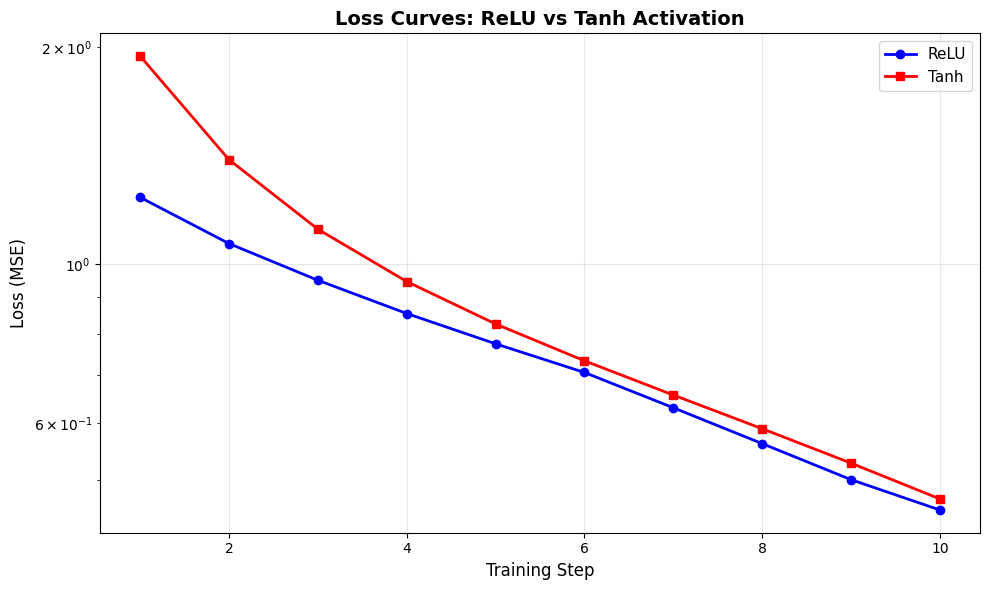

In [52]:
# Exercise: Compare ReLU vs Tanh activation functions
# This will help you understand how different activations affect training

import matplotlib.pyplot as plt

# Reset seed for fair comparison
torch.manual_seed(123)

# Create the same training data
x_train = torch.randn(8, 6)
true_w = torch.tensor([[0.5], [-1.0], [0.3], [0.0], [1.2], [-0.7]])
y_train = x_train @ true_w + 0.01 * torch.randn(8, 1)

# Create ReLU model
model_relu = SimpleNet()
loss_fn = nn.MSELoss()
opt_relu = torch.optim.SGD(model_relu.parameters(), lr=0.1)

# Create Tanh model (same architecture but with Tanh activation)
class SimpleNetTanh(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=8, output_dim=1):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.tanh = nn.Tanh()  # Tanh instead of ReLU

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)  # Tanh activation
        x = self.fc2(x)
        return x

model_tanh = SimpleNetTanh()
opt_tanh = torch.optim.SGD(model_tanh.parameters(), lr=0.1)

# Train both models for 10 steps and track losses
num_steps = 10
losses_relu = []
losses_tanh = []

print("Training both models for 10 steps...\n")

for step in range(num_steps):
    # Train ReLU model
    opt_relu.zero_grad()
    loss_relu = loss_fn(model_relu(x_train), y_train)
    loss_relu.backward()
    opt_relu.step()
    losses_relu.append(float(loss_relu))

    # Train Tanh model
    opt_tanh.zero_grad()
    loss_tanh = loss_fn(model_tanh(x_train), y_train)
    loss_tanh.backward()
    opt_tanh.step()
    losses_tanh.append(float(loss_tanh))

    if step < 3 or step == num_steps - 1:
        print(f"Step {step+1}: ReLU loss = {losses_relu[-1]:.6f}, Tanh loss = {losses_tanh[-1]:.6f}")

# Compare final losses
print(f"\nFinal ReLU loss: {losses_relu[-1]:.6f}")
print(f"Final Tanh loss: {losses_tanh[-1]:.6f}")

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_steps + 1), losses_relu, 'b-o', label='ReLU', linewidth=2, markersize=6)
plt.plot(range(1, num_steps + 1), losses_tanh, 'r-s', label='Tanh', linewidth=2, markersize=6)
plt.xlabel('Training Step', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Loss Curves: ReLU vs Tanh Activation', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale to better see differences
plt.tight_layout()
plt.show()